In [2]:
import json
import random

In [3]:
import numpy as np
np.random.seed(369)
import scipy.stats as scs
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.externals import joblib

/home/kurtrm/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kurtrm/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
from frag_tools import (EquipmentScaler,
                        TargetBinarizer,
                        NameChanger,
                        MakeDummies,
                        DropColumns)
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, precision_recall_curve, average_precision_score

In [6]:
raw_df = pd.read_csv('../static/data/machine_failures.csv')

In [7]:
scaled_pipe = Pipeline([
('name_changer', NameChanger()),
('scaler', EquipmentScaler(['temp', 'humidity', 'Measure1', 'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14', 'Measure15', 'hours_since_prev_fail'])),
('get_dummies', MakeDummies(['Operator', 'day-of-week'])),
('scale_y', TargetBinarizer('failure')),
('drop_cols', DropColumns(['date', 'year', 'month', 'day-of-month', 'hour', 'minute', 'second', 'hours_since_prev_fail',
                         'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                         'Saturday', 'Sunday']))
])
scaled_data = scaled_pipe.fit_transform(raw_df)

/home/kurtrm/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
const_pipe = Pipeline([
('name_changer', NameChanger()),
('get_dummies', MakeDummies(['Operator', 'day-of-week'])),
('scale_y', TargetBinarizer('failure')),
('drop_cols', DropColumns(['date', 'year', 'month', 'day-of-month', 'hour', 'minute', 'second',
                         'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                         'Saturday', 'Sunday']))
])
const_data = const_pipe.fit_transform(raw_df)

In [9]:
scaled_data.describe()

,temp,humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,...,Measure15,failure,Operator1,Operator2,Operator3,Operator4,Operator5,Operator6,Operator7,Operator8
count,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,...,8.784000e+03,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,1.298218e-15,7.780977e-15,-7.975304e-17,-8.316561e-18,-3.999703e-17,-5.389334e-17,4.036945e-17,-1.517330e-16,9.689173e-17,1.412046e-16,...,-1.395615e-16,0.009221,0.111111,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,...,1.000057e+00,0.095589,0.314288,0.415763,0.314288,0.314288,0.314288,0.314288,0.314288,0.314288
min,-2.057623e+01,-3.791804e+00,-1.742613e+00,-1.335556e+00,-1.223874e+00,-1.708575e+00,-1.727206e+00,-1.724846e+00,-1.731621e+00,-1.716960e+00,...,-1.725391e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.063942e-01,-6.900544e-01,-8.600421e-01,-1.335556e+00,-1.223874e+00,-8.627965e-01,-8.812564e-01,-8.483996e-01,-8.657150e-01,-8.661846e-01,...,-8.714324e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.206936e-03,-6.970461e-02,9.495298e-03,-4.391302e-01,9.760872e-04,-2.540578e-02,2.207986e-03,-7.535552e-03,3.907568e-03,-6.101024e-03,...,-1.189273e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.879803e-01,7.574285e-01,8.641370e-01,4.572955e-01,1.225826e+00,8.599823e-01,8.725423e-01,8.632924e-01,8.753883e-01,8.632908e-01,...,8.699727e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.871104e+00,7.994843e+00,1.713193e+00,1.353721e+00,1.225826e+00,1.750962e+00,1.754131e+00,1.750975e+00,1.717138e+00,1.738268e+00,...,1.727652e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


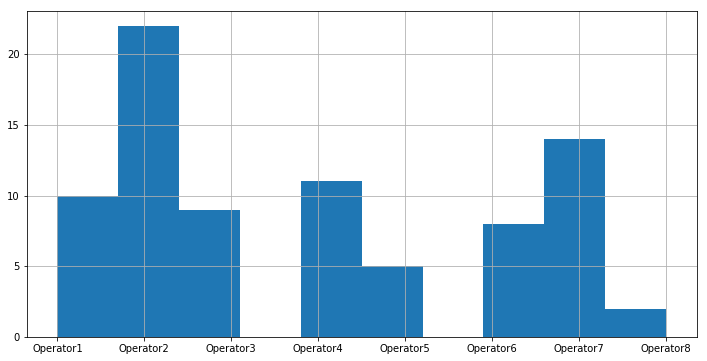

In [10]:
raw_df['Operator'][scaled_data['failure'] == 1].hist(figsize=(12, 6))

In [11]:
raw_df['Operator'].value_counts()

Operator2    1952
Operator6     976
Operator5     976
Operator4     976
Operator1     976
Operator3     976
Operator7     976
Operator8     976
Name: Operator, dtype: int64

Operator2 is the available operator during most of the failures, but they are also available twice as often as the rest of the operators.

In [12]:
sensor_readings = raw_df[[f'Measure{i}' for i in range(1, 16)]]

In [13]:
sensor_readings[scaled_data['failure'] == 0].describe()

,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15
count,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000
mean,1091.280018,1.490865,0.999081,1072.045846,1075.206481,1075.846605,1086.252212,1078.296909,1082.743422,1081.428588,1089.439733,1088.137539,1076.169252,1087.757670,1082.125704
std,537.331586,1.115128,0.816824,536.569867,532.990545,533.678537,538.492961,537.179775,533.113779,537.363433,535.027400,533.655995,535.326365,537.180277,537.498390
min,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
25%,628.500000,0.000000,0.000000,609.000000,605.000000,623.500000,620.000000,614.000000,632.500000,618.500000,628.000000,627.000000,609.000000,616.500000,614.500000
50%,1097.000000,1.000000,1.000000,1058.000000,1076.000000,1072.000000,1089.000000,1075.000000,1079.000000,1077.000000,1094.000000,1082.000000,1067.000000,1088.000000,1076.000000
75%,1555.000000,2.000000,2.000000,1533.000000,1540.000000,1537.000000,1558.000000,1542.500000,1532.500000,1546.000000,1550.000000,1552.000000,1539.000000,1559.000000,1550.000000
max,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000


In [14]:
sensor_readings[scaled_data['failure'] == 1].describe()

,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.00000,81.000000
mean,1050.111111,1.382716,1.012346,1026.938272,1142.049383,1095.061728,1156.185185,967.716049,1003.703704,1187.098765,1011.296296,1108.938272,1139.777778,1147.37037,1111.037037
std,512.887146,1.167989,0.782525,532.362009,550.313658,571.196996,503.478577,529.937478,515.948143,554.129579,529.166407,496.138775,510.714451,546.42544,543.254371
min,166.000000,0.000000,0.000000,174.000000,160.000000,165.000000,173.000000,166.000000,160.000000,170.000000,174.000000,174.000000,258.000000,157.00000,244.000000
25%,725.000000,0.000000,0.000000,466.000000,695.000000,586.000000,772.000000,493.000000,551.000000,698.000000,554.000000,678.000000,664.000000,666.00000,579.000000
50%,970.000000,1.000000,1.000000,1074.000000,1201.000000,1094.000000,1098.000000,938.000000,992.000000,1273.000000,952.000000,1077.000000,1154.000000,1103.00000,1066.000000
75%,1484.000000,2.000000,2.000000,1457.000000,1645.000000,1536.000000,1542.000000,1394.000000,1401.000000,1641.000000,1505.000000,1546.000000,1595.000000,1655.00000,1603.000000
max,1975.000000,3.000000,2.000000,1959.000000,1984.000000,1993.000000,2007.000000,2004.000000,2001.000000,1985.000000,1927.000000,2005.000000,1972.000000,1998.00000,1973.000000


In [15]:
sensor_readings[scaled_data['failure'] == 0].describe() - sensor_readings[scaled_data['failure'] == 1].describe()

,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000
mean,41.168907,0.108149,-0.013265,45.107575,-66.842902,-19.215124,-69.932973,110.580860,79.039718,-105.670178,78.143437,-20.800733,-63.608526,-59.612701,-28.911333
std,24.444440,-0.052861,0.034299,4.207858,-17.323113,-37.518460,35.014383,7.242296,17.165636,-16.766146,5.860993,37.517221,24.611915,-9.245163,-5.755981
min,-11.000000,0.000000,0.000000,-19.000000,-5.000000,-10.000000,-18.000000,-11.000000,-5.000000,-15.000000,-19.000000,-19.000000,-103.000000,-2.000000,-89.000000
25%,-96.500000,0.000000,0.000000,143.000000,-90.000000,37.500000,-152.000000,121.000000,81.500000,-79.500000,74.000000,-51.000000,-55.000000,-49.500000,35.500000
50%,127.000000,0.000000,0.000000,-16.000000,-125.000000,-22.000000,-9.000000,137.000000,87.000000,-196.000000,142.000000,5.000000,-87.000000,-15.000000,10.000000
75%,71.000000,0.000000,0.000000,76.000000,-105.000000,1.000000,16.000000,148.500000,131.500000,-95.000000,45.000000,6.000000,-56.000000,-96.000000,-53.000000
max,36.000000,0.000000,0.000000,52.000000,27.000000,18.000000,4.000000,7.000000,10.000000,26.000000,84.000000,6.000000,39.000000,13.000000,38.000000


Means of sensor readings at failure are not abnormal, all within one standard deviation.

The minimums and maximums for all measures are the same, which is kind of weird.

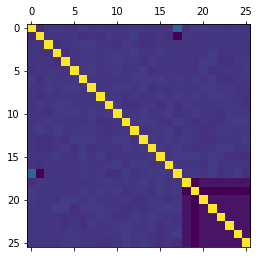

In [16]:
plt.matshow(scaled_data.corr())

In [17]:
scaled_train, scaled_test = train_test_split(scaled_data, test_size=.2)
const_train, const_test = train_test_split(const_data, test_size=.2)

In [18]:
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_train.drop('failure', axis=1).values, scaled_train['failure'].values, test_size=.2)
const_X_train, const_X_test, const_y_train, const_y_test = train_test_split(const_train.drop('failure', axis=1).values, const_train['failure'].values, test_size=.2)

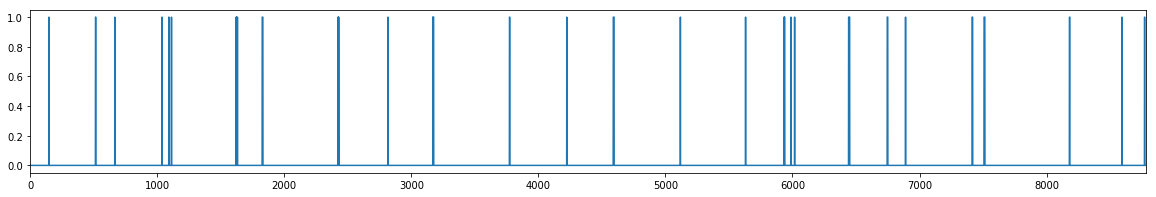

In [19]:
(const_data['failure'] == 1).plot(figsize=(20, 3))

In [20]:
scaled_rfc = RandomForestClassifier(50)
scaled_log_reg = LogisticRegression()
scaled_gb = GradientBoostingClassifier(learning_rate=.005, subsample=.5, n_estimators=250)
const_rfc = RandomForestClassifier(50)
const_log_reg = LogisticRegression()
const_gb = GradientBoostingClassifier(learning_rate=.005, subsample=.5, n_estimators=250)
scaled_rfc.fit(scaled_X_train, scaled_y_train)
scaled_log_reg.fit(scaled_X_train, scaled_y_train)
scaled_gb.fit(scaled_X_train, scaled_y_train)
const_rfc.fit(const_X_train, const_y_train)
const_log_reg.fit(const_X_train, const_y_train)
const_gb.fit(const_X_train, const_y_train);

In [21]:
def print_model_metrics(model, X_test, y_test):
    """
    Print precision, recall, f1, support, and auc of a given
    model.
    """
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(model.__class__.__name__, "Metrics")
    print("Classes: ", f'    {model.classes_[0]}       ', f'{model.classes_[1]}')
    print("--" * 10)
    print('Precision: ', f' {precision[0]:.3f}   ', f'{precision[1]:.3f}')
    print('Recall: ', f'    {recall[0]:.3f}   ', f'{recall[1]:.3f}')
    print('f1: ', f'        {f1[0]:.3f}   ', f'{f1[1]:.3f}')
    print(f'AUC:           {auc:.3f}')
    print('Recall: ', f'    {support[0]}    ', f'{support[1]}\n')

In [22]:
for scaled_mod in [scaled_rfc, scaled_log_reg, scaled_gb]:
    print("Scaled data: ")
    print_model_metrics(scaled_mod, scaled_X_test, scaled_y_test)
for const_mod in [const_rfc, const_log_reg, const_gb]:
    print("Unscaled data: ")
    print_model_metrics(const_mod, const_X_test, const_y_test)

Scaled data: 
RandomForestClassifier Metrics
Classes:      0        1
--------------------
Precision:   0.998    1.000
Recall:      1.000    0.750
f1:          0.999    0.857
AUC:           0.875
Recall:      1394     12

Scaled data: 
LogisticRegression Metrics
Classes:      0        1
--------------------
Precision:   0.997    1.000
Recall:      1.000    0.667
f1:          0.999    0.800
AUC:           0.833
Recall:      1394     12

Scaled data: 
GradientBoostingClassifier Metrics
Classes:      0        1
--------------------
Precision:   0.998    0.900
Recall:      0.999    0.750
f1:          0.999    0.818
AUC:           0.875
Recall:      1394     12

Unscaled data: 
RandomForestClassifier Metrics
Classes:      0        1
--------------------
Precision:   0.998    1.000
Recall:      1.000    0.700
f1:          0.999    0.824
AUC:           0.850
Recall:      1396     10

Unscaled data: 
LogisticRegression Metrics
Classes:      0        1
--------------------
Precision:   0.997   

## Note
Later I realized that all of these scores assume a threshold of .5. Additionally, since my labels are 1 or 0, it was interpreting these as probabilities, causing a reduction in the AUC score. It turns out my AUCs are unusually high.

I'll explore getting logistic regression on track later, but for the time being I'll save these models for later use (perhaps).

In [23]:
joblib.dump(scaled_rfc, '../static/models/grad_boost.pkl')
joblib.dump(scaled_gb, '../static/models/rand_forest.pkl')

['../static/models/grad_boost.pkl']

['../static/models/rand_forest.pkl']

In [24]:
def roc(model, X_test, y_test):
    """
    Compute TPRs and FPRs for ROC curve.
    
    """
    probs = model.predict_proba(X_test)[:, 1]
    sorted_probs = np.sort(probs)
    actual_pos = len(y_test[y_test == 1])
    actual_neg = len(y_test) - actual_pos
    fprs = np.empty(len(y_test))
    tprs = np.empty(len(y_test))
    for i, prob in enumerate(np.linspace(0, 1, len(sorted_probs))):
        partition = y_test[probs > prob]
        true_positives = len(partition[partition == 1])
        false_positives = len(partition[partition == 0])
        true_pos_rate = true_positives / actual_pos
        false_pos_rate = false_positives / actual_neg
        tprs[i] = true_pos_rate
        fprs[i] = false_pos_rate
    
    return tprs, fprs

In [25]:
def plot_roc(model, X_test, y_test, ax=None):
    """
    Compute ROC and AUC and graph.
    """
    if ax is None:
        fig, ax = plt.subplots()
    tprs, fprs = roc(model, X_test, y_test)
    ax.plot(fprs, tprs)
    ax.set_title('ROC Curve')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

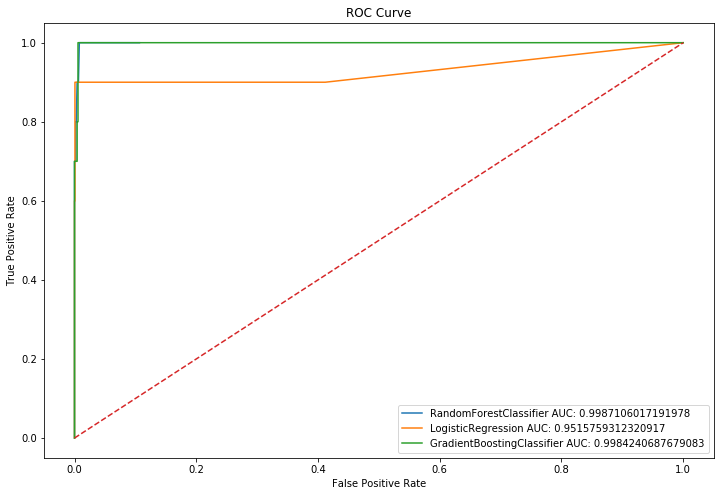

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
legend = []
for model in [const_rfc, const_log_reg, const_gb]:
    plot_roc(model, const_X_test, const_y_test, ax)
    auc_score = roc_auc_score(const_y_test, model.predict_proba(const_X_test)[:, 1])
    legend_data = '{} AUC: {}'.format(model.__class__.__name__, auc_score)
    legend.append(legend_data)
ax.legend(legend)
dashed_line = np.linspace(0, 1, 100)
ax.plot(dashed_line, dashed_line, '--');

Hmmm, not sure what to make of these models, but there's still some work to do.

In [27]:
roc_auc_score(const_y_test, const_rfc.predict_proba(const_X_test)[:, 1])
roc_auc_score(const_y_test, const_rfc.predict(const_X_test))

0.99871060171919779

0.84999999999999998

In [28]:
const_y_test.sum()

10

In [29]:
const_y_train.sum()

58

In [30]:
const_X_train

array([[  64,   80, 1907, ...,    0,    0,    0],
       [  62,   88, 1991, ...,    0,    0,    0],
       [  68,   81,  182, ...,    0,    0,    1],
       ..., 
       [  66,   88, 1726, ...,    0,    0,    1],
       [  62,   81, 1578, ...,    0,    0,    0],
       [  60,   79,  439, ...,    0,    0,    0]])

In [31]:
const_X_test.sum(axis=0)

array([  89874,  117008, 1543533,    2043,    1397, 1490216, 1500743,
       1507732, 1565882, 1530937, 1532219, 1500988, 1501101, 1523368,
       1480718, 1513708, 1495420,  305496,     157,     296,     163,
           161,     168,     159,     144,     158])

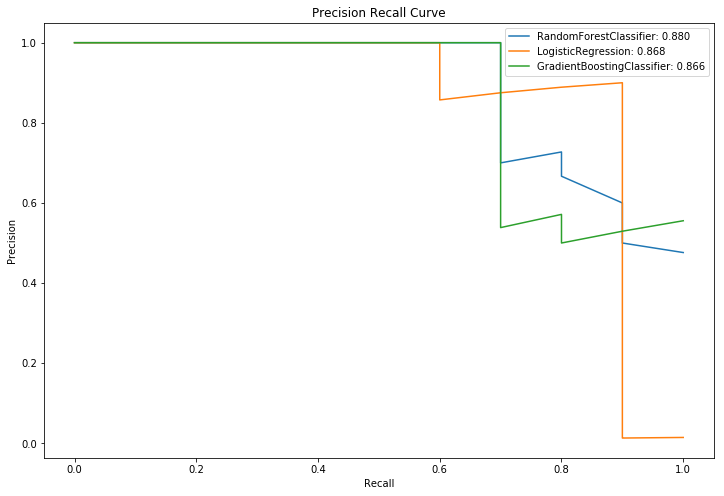

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
for const_mod in [const_rfc, const_log_reg, const_gb]:
    precision, recall, threshold = precision_recall_curve(const_y_test, const_mod.predict_proba(const_X_test)[:, 1])
    avg_prec = average_precision_score(const_y_test, const_mod.predict_proba(const_X_test)[:, 1])
    ax.plot(recall, precision, label=f'{const_mod.__class__.__name__}: {avg_prec:.3f}')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.set_title('Precision Recall Curve')
ax.legend();

In [33]:
def cross_val_metrics(model, X_test, y_test):
    """
    Print precision, recall, f1, support, and auc of a given
    model.
    """
    print(model.__class__.__name__, "Metrics")
    print("--" * 10)
    metrics = ['average_precision', 'f1', 'roc_auc', 'neg_log_loss', 'recall']
    for metric in metrics:
        scores = cross_val_score(model, X_test, y_test, scoring=metric, cv=5)
        print(f'Average {metric} across 5 folds: {scores.mean():.3f}')
        print('--' * 10)
    print('\n')

In [34]:
scaled_y_train.sum()
len(scaled_X_train)

58

5621

In [35]:
all_models = [RandomForestClassifier(50),
              LogisticRegression(),
              GradientBoostingClassifier(learning_rate=.005, subsample=.5, n_estimators=250)]
for scaled in all_models:
    cross_val_metrics(scaled, scaled_X_train, scaled_y_train)
for const in all_models:
    cross_val_metrics(const, const_X_train, const_y_train)

RandomForestClassifier Metrics
--------------------
Average average_precision across 5 folds: 0.738
--------------------
Average f1 across 5 folds: 0.693
--------------------
Average roc_auc across 5 folds: 0.888
--------------------
Average neg_log_loss across 5 folds: -0.084
--------------------
Average recall across 5 folds: 0.656
--------------------


LogisticRegression Metrics
--------------------
Average average_precision across 5 folds: 0.721
--------------------
Average f1 across 5 folds: 0.682
--------------------
Average roc_auc across 5 folds: 0.912
--------------------
Average neg_log_loss across 5 folds: -0.027
--------------------
Average recall across 5 folds: 0.535
--------------------


GradientBoostingClassifier Metrics
--------------------
Average average_precision across 5 folds: 0.739
--------------------
Average f1 across 5 folds: 0.679
--------------------
Average roc_auc across 5 folds: 0.884
--------------------
Average neg_log_loss across 5 folds: -0.025
----

After a discussion with Jack, I'm realizing that I don't know if the failure is due to the sensor readings on the hour that failure occurs or the sensor readings are a result of the machinery failure. I'm going to try shifting the 1 labels up one row to see if this helps.

In [36]:
raw_df.head(1)

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,...,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,...,1842,90,No,2016,1,1,5,0,0,0


In [37]:
shifted_scaled = scaled_data.copy()
shifted_scaled['failure'] = shifted_scaled['failure'].shift(-1)
shifted_scaled = shifted_scaled.iloc[:-1]

In [38]:
shifted_const = const_data.copy()
shifted_const['failure'] = shifted_const['failure'].shift(-1)
shifted_const = shifted_const.iloc[:-1]

In [39]:
shifted_scaled_train, shifted_scaled_test = train_test_split(shifted_scaled, test_size=.2)
shifted_const_train, shifted_const_test = train_test_split(shifted_const, test_size=.2)

In [40]:
shifted_scaled_X_train, shifted_scaled_X_test, shifted_scaled_y_train, shifted_scaled_y_test = train_test_split(shifted_scaled_train.drop('failure', axis=1).values, shifted_scaled_train['failure'].values, test_size=.2)
shifted_const_X_train, shifted_const_X_test, shifted_const_y_train, shifted_const_y_test = train_test_split(shifted_const_train.drop('failure', axis=1).values, shifted_const_train['failure'].values, test_size=.2)

In [41]:
all_models = [RandomForestClassifier(50),
              LogisticRegression(),
              GradientBoostingClassifier(learning_rate=.005, subsample=.5, n_estimators=250)]
for scaled in all_models:
    cross_val_metrics(scaled, shifted_scaled_X_train, shifted_scaled_y_train)
for const in all_models:
    cross_val_metrics(const, shifted_const_X_train, shifted_const_y_train)

RandomForestClassifier Metrics
--------------------
Average average_precision across 5 folds: 0.427
--------------------
Average f1 across 5 folds: 0.401
--------------------
Average roc_auc across 5 folds: 0.801
--------------------
Average neg_log_loss across 5 folds: -0.113
--------------------
Average recall across 5 folds: 0.289
--------------------


LogisticRegression Metrics
--------------------
Average average_precision across 5 folds: 0.461
--------------------
Average f1 across 5 folds: 0.311
--------------------
Average roc_auc across 5 folds: 0.786
--------------------
Average neg_log_loss across 5 folds: -0.036
--------------------
Average recall across 5 folds: 0.207
--------------------


GradientBoostingClassifier Metrics
--------------------
Average average_precision across 5 folds: 0.298
--------------------
Average f1 across 5 folds: 0.150
--------------------
Average roc_auc across 5 folds: 0.734
--------------------
Average neg_log_loss across 5 folds: -0.035
----

The roc_auc is still arbitrarily high with the shift in the labels. This may mean that there is some other aspect of the data that is leaking, or that the roc_auc score is not as reliable a metric as others. The argument here is that the model performance is adequate, but the FPR doesn't vary as much with changes in the FPR since the Total Real Negatives is so high. TPR varies a lot more with changes in the number of False Positives than the FPR varies with changes in the number of False Positives.

In [42]:
11/(11 + 5205), 21/(21 + 5205)

(0.0021088957055214724, 0.004018369690011481)

In [43]:
110/(110 + 5205), 210/(210 + 5205)

(0.020696142991533398, 0.038781163434903045)

In [44]:
11 / (11 + 11), 11 / (11 + 21)

(0.5, 0.34375)

In [45]:
train_leakage = [100 * random.random() + 50 if label else 10 * random.random() for label in const_y_train]
test_leakage = [100 * random.random() + 50 if label else 10 * random.random() for label in const_y_test]

In [46]:
leaked_const_X_train = np.concatenate([const_X_train, np.array(train_leakage).reshape(-1, 1)], axis=1)
leaked_const_X_test = np.concatenate([const_X_test, np.array(test_leakage).reshape(-1, 1)], axis=1)

In [47]:
all_models = [RandomForestClassifier(50),
              LogisticRegression(),
              GradientBoostingClassifier(learning_rate=.005, subsample=.5, n_estimators=250)]
for const in all_models:
    cross_val_metrics(const, leaked_const_X_train, const_y_train)

RandomForestClassifier Metrics
--------------------
Average average_precision across 5 folds: 1.000
--------------------
Average f1 across 5 folds: 1.000
--------------------
Average roc_auc across 5 folds: 1.000
--------------------
Average neg_log_loss across 5 folds: -0.004
--------------------
Average recall across 5 folds: 1.000
--------------------


LogisticRegression Metrics
--------------------
Average average_precision across 5 folds: 1.000
--------------------
Average f1 across 5 folds: 1.000
--------------------
Average roc_auc across 5 folds: 1.000
--------------------
Average neg_log_loss across 5 folds: -0.000
--------------------
Average recall across 5 folds: 1.000
--------------------


GradientBoostingClassifier Metrics
--------------------
Average average_precision across 5 folds: 1.000
--------------------
Average f1 across 5 folds: 1.000
--------------------
Average roc_auc across 5 folds: 1.000
--------------------
Average neg_log_loss across 5 folds: -0.006
----

In [48]:
# const_data['hours_since_prev_fail'][const_data['failure'] == 1].value_counts()

Had a revelation that there may be some data leakage in the one time related column I left in, 'hours_since_prev_fail'. Upon taking a closer look at it, most of the failures occur within an hour of a previous failure. This means that the model had greater than a 50% chance to guess correctly if it used this feature alone. We want our predictions to be a little more educated, so let's see how the model does without this feature.

In [49]:
new_scaled_pipe = Pipeline([
('name_changer', NameChanger()),
('scaler', EquipmentScaler(['temp', 'humidity', 'Measure1', 'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14', 'Measure15', 'hours_since_prev_fail'])),
('get_dummies', MakeDummies(['Operator', 'day-of-week'])),
('scale_y', TargetBinarizer('failure')),
('drop_cols', DropColumns(['date', 'year', 'month', 'day-of-month', 'hour', 'minute', 'second', 'hours_since_prev_fail',
                         'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                         'Saturday', 'Sunday']))
])
new_scaled_data = new_scaled_pipe.fit_transform(raw_df)

/home/kurtrm/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
new_const_pipe = Pipeline([
('name_changer', NameChanger()),
('get_dummies', MakeDummies(['Operator', 'day-of-week'])),
('scale_y', TargetBinarizer('failure')),
('drop_cols', DropColumns(['date', 'year', 'month', 'day-of-month', 'hour', 'minute', 'second', 'hours_since_prev_fail',
                         'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                         'Saturday', 'Sunday']))
])
new_const_data = new_const_pipe.fit_transform(raw_df)

In [51]:
new_scaled_train, new_scaled_test = train_test_split(new_scaled_data, test_size=.2)
new_const_train, new_const_test = train_test_split(new_const_data, test_size=.2)

In [52]:
new_scaled_X_train, new_scaled_X_test, new_scaled_y_train, new_scaled_y_test = train_test_split(new_scaled_train.drop('failure', axis=1).values, new_scaled_train['failure'].values, test_size=.2)
new_const_X_train, new_const_X_test, new_const_y_train, new_const_y_test = train_test_split(new_const_train.drop('failure', axis=1).values, new_const_train['failure'].values, test_size=.2)

In [53]:
all_models = [RandomForestClassifier(50),
              LogisticRegression(),
              GradientBoostingClassifier(learning_rate=.005, subsample=.5, n_estimators=250)]
for scaled in all_models:
    cross_val_metrics(scaled, new_scaled_X_train, new_scaled_y_train)
for const in all_models:
    cross_val_metrics(const, new_const_X_train, new_const_y_train)

RandomForestClassifier Metrics
--------------------
Average average_precision across 5 folds: 0.726
--------------------
Average f1 across 5 folds: 0.668
--------------------
Average roc_auc across 5 folds: 0.882
--------------------
Average neg_log_loss across 5 folds: -0.066
--------------------
Average recall across 5 folds: 0.567
--------------------


LogisticRegression Metrics
--------------------
Average average_precision across 5 folds: 0.723
--------------------
Average f1 across 5 folds: 0.653
--------------------
Average roc_auc across 5 folds: 0.920
--------------------
Average neg_log_loss across 5 folds: -0.024
--------------------
Average recall across 5 folds: 0.505
--------------------


GradientBoostingClassifier Metrics
--------------------
Average average_precision across 5 folds: 0.639
--------------------
Average f1 across 5 folds: 0.698
--------------------
Average roc_auc across 5 folds: 0.888
--------------------
Average neg_log_loss across 5 folds: -0.026
----

In [54]:
roc_auc_score(new_const_y_test, RandomForestClassifier(50).fit(new_const_X_train, new_const_y_train).predict_proba(new_const_X_test)[:, 1])

0.87027757893899627

In [55]:
roc_auc_score(new_const_y_test, RandomForestClassifier(50).fit(new_const_X_train, new_const_y_train).predict(new_const_X_test))

0.66666666666666663

In [57]:
metrics = ['average_precision', 'f1', 'roc_auc', 'neg_log_loss', 'recall']

In [58]:
def cross_val_metrics(model, X_test, y_test, metrics):
    """
    Print precision, recall, f1, support, and auc of a given
    model.
    """
    metrics_dict = {}
    for metric in metrics:
        scores = cross_val_score(model, X_test, y_test, scoring=metric, cv=5)
        metrics_dict[metric] = scores.mean()
    return metrics_dict

In [63]:
def make_metric_df(models: list, X_train: np.ndarray, y_train: np.ndarray, metrics: list) -> 'DataFrame':
    dataframe_dict = {}
    for model in models:
        score = cross_val_metrics(model, X_train, y_train, metrics)
        dataframe_dict[model.__class__.__name__] = score
    return dataframe_dict

In [65]:
df_dict = make_metric_df([RandomForestClassifier(50), LogisticRegression(),
                GradientBoostingClassifier(learning_rate=.005, subsample=.5, n_estimators=250)],
               const_X_train, const_y_train, metrics)

In [66]:
pd.DataFrame(df_dict)

,GradientBoostingClassifier,LogisticRegression,RandomForestClassifier
average_precision,0.766551,0.752818,0.805741
f1,0.764631,0.734957,0.807382
neg_log_loss,-0.022345,-0.025945,-0.053207
recall,0.675758,0.589394,0.727273
roc_auc,0.926761,0.903332,0.921099


In [67]:
scaled_df_dict = make_metric_df([RandomForestClassifier(50), LogisticRegression(),
                GradientBoostingClassifier(learning_rate=.005, subsample=.5, n_estimators=250)],
               scaled_X_train, scaled_y_train, metrics)

In [68]:
pd.DataFrame(scaled_df_dict)

,GradientBoostingClassifier,LogisticRegression,RandomForestClassifier
average_precision,0.727985,0.720760,0.739334
f1,0.679035,0.682102,0.718596
neg_log_loss,-0.024873,-0.026849,-0.083469
recall,0.551515,0.534848,0.639394
roc_auc,0.882353,0.911949,0.886391


In [69]:
raw_df.head()

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,...,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,...,1842,90,No,2016,1,1,5,0,0,0
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,...,748,91,No,2016,1,1,5,1,0,0
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,...,1689,92,No,2016,1,1,5,2,0,0
3,2016-01-01 03:00:00,63,80,Operator1,550,1,1,1754,1834,1413,...,711,93,No,2016,1,1,5,3,0,0
4,2016-01-01 04:00:00,65,81,Operator1,1928,1,2,1326,1082,233,...,507,94,No,2016,1,1,5,4,0,0


In [71]:
const_data.head()

,temp,humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,...,hours_since_prev_fail,failure,Operator1,Operator2,Operator3,Operator4,Operator5,Operator6,Operator7,Operator8
0,67,82,291,1,1,1041,846,334,706,1086,...,90,0,1,0,0,0,0,0,0,0
1,68,77,1180,1,1,1915,1194,637,1093,524,...,91,0,1,0,0,0,0,0,0,0
2,64,76,1406,1,1,511,1577,1121,1948,1882,...,92,0,1,0,0,0,0,0,0,0
3,63,80,550,1,1,1754,1834,1413,1151,945,...,93,0,1,0,0,0,0,0,0,0
4,65,81,1928,1,2,1326,1082,233,1441,1736,...,94,0,1,0,0,0,0,0,0,0
